# Assignment 5_160204093_K Means Clustering

Read file from gdrive

In [40]:
import numpy as np
import math
from google.colab import drive
drive.mount('/content/gdrive')
# change working directory on the drive
%cd '/content/gdrive/My Drive/Data/'

# read train.txt file line by line
with open('data_k_mean.txt', "r") as file:
    FileasList = file.read().splitlines()

# split the string and store it into another list classwise
data = []
x = []
y = []
for i in range(len(FileasList)):
  data.append(FileasList[i].split())
  x.append(float(data[i][0]))
  y.append(float(data[i][1]))

for i in range(len(data)):
  data[i] = [float(data[i][0]),float(data[i][1])]
data = np.array(data)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Data


Plotting all sample points from train data 

No handles with labels found to put in legend.


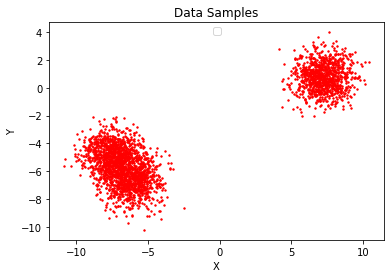

In [116]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c = 'r', marker = 'o', s = 2)
plt.title("Data Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = 'upper center')


Euclidean Distance

In [5]:
def eu_dis(a,b):
  dis = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
  return dis

Assigned cluster's Index finder

In [ ]:
def find_index(list,key):
  indexes = []
  for i in range (len(list)):
    if(list[i] == key):
      indexes.append(i)
  return indexes

Cluster Update

In [ ]:
def cluster_update(k, data, cluster_assign):
  cluster = []
  for i in range(k):
    index = find_index(cluster_assign ,i+1)
    temp = np.array([0,0])
    for j in index:
      temp = temp + data[j]
    temp = temp / len(index)
    cluster.append(temp)
  return cluster

**K means Clustering**

In [104]:
def k_means_clustering(k, data):
  cluster = []
  for i in range(k):
    cluster.append(np.array([x[i],y[i]]))

  flag = 0
  while(flag != k):
    flag = 0
    cluster_assign = []
    for d in data:
      c_dis = []
      for i in range(k):
        c_dis.append(eu_dis(cluster[i],d))
      minpos = c_dis.index(min(c_dis)) + 1
      cluster_assign.append(minpos)
    
    # cluster update
    temp = cluster
    cluster = cluster_update(k,data,cluster_assign)
    
    for i in range(k):
      if(temp[i][0] == cluster[i][0] and temp[i][1] == cluster[i][1]):
        flag = flag + 1

  return cluster_assign

  

**Clustering and plotting**

Enter the value of K: 2


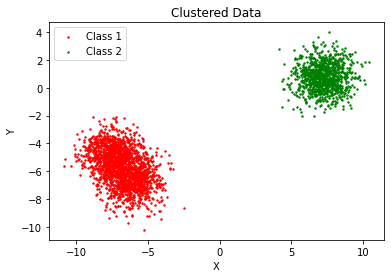

In [136]:
k = int(input("Enter the value of K: "))
clustered_label = k_means_clustering(k,data)

x1 = []
y1 = []
x2 = []
y2 = []

for i in range(len(clustered_label)):
  if(clustered_label[i] == 1):
    x1.append(data[i][0])
    y1.append(data[i][1])
  else:
    x2.append(data[i][0])
    y2.append(data[i][1])

plt.scatter(x1, y1, c = 'r', marker = 'o', label = 'Class 1', s = 2)
plt.scatter(x2, y2, c = 'g', marker = 'o', label = 'Class 2', s = 2)
plt.title("Clustered Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = 'upper left')